In [1]:
import jupyter_black

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms

from PIL import Image

import sys

if not "/usr/src" in sys.path:
    sys.path.append("/usr/src")

jupyter_black.load()

In [2]:
# Custom modules
from dataset import create_cell_dataset, augmentation_cells
from unet import UNet
from diffusion import Diffusion
from utils.diffusion import show_samples, logging

In [3]:
# Dirs
cell_dir = "/usr/src/separated_cells"
new_cell_dir = "/usr/src/separated_cells_new"
augmentation_cells(cell_dir, new_cell_dir)

In [5]:
cell_dataset = create_cell_dataset(new_cell_dir)

image_size = 64
channels = 1
batch_size = 30

train_loader = DataLoader(cell_dataset, batch_size=batch_size, shuffle=True)

In [8]:
# # define image transformations (e.g. using torchvision)
# transform = transforms.Compose(
#     [
#         transforms.Resize(32),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Lambda(lambda t: (t * 2) - 1),
#     ]
# )

# train_dataset = FashionMNIST(
#     root="./data/FashionMNIST", train=True, transform=transform, download=True
# )

# image_size = 32
# channels = 1
# batch_size = 128

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = UNet(
    img_dim=image_size,
    img_channels=channels,
    in_channels=32,
    channel_mults=(1, 2, 4, 8),
)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [20]:
timesteps = 400
diffusion = Diffusion(timesteps)

In [21]:
epochs = 20
log_interval = len(train_loader) // 4
log_path = "logging_cells"
n_log_samples = 10

for epoch in range(epochs):
    print(f"----- Epoch {epoch + 1} -----")
    for step, batch in enumerate(train_loader):
        optimizer.zero_grad()

        batch_size = batch.shape[0]
        batch = batch.to(device)

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, timesteps, (batch_size,), device=device).long()

        loss = diffusion.p_losses(model, batch, t, loss_type="huber")

        if step % log_interval == 0:
            print("Loss:", loss.item())

        loss.backward()
        optimizer.step()

    logging(log_path, diffusion, model, epoch, n_log_samples, image_size, channels)

----- Epoch 1 -----
Loss: 0.6026761531829834
Loss: 0.04024184122681618
Loss: 0.03254852816462517
Loss: 0.02991975098848343
Loss: 0.03021695837378502


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 2 -----
Loss: 0.029487373307347298
Loss: 0.013867976143956184
Loss: 0.020286232233047485
Loss: 0.014712650328874588
Loss: 0.014019124209880829


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 3 -----
Loss: 0.02212236076593399
Loss: 0.028822172433137894
Loss: 0.025592532008886337
Loss: 0.019123312085866928
Loss: 0.018604284152388573


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 4 -----
Loss: 0.017494136467576027
Loss: 0.01650307886302471
Loss: 0.02526092156767845
Loss: 0.013933995738625526
Loss: 0.01484778430312872


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 5 -----
Loss: 0.01949285715818405
Loss: 0.011851552873849869
Loss: 0.011818994767963886
Loss: 0.019467506557703018
Loss: 0.01037431787699461


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 6 -----
Loss: 0.009160730056464672
Loss: 0.011569327674806118
Loss: 0.01684131659567356
Loss: 0.011534260585904121
Loss: 0.01798153854906559


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 7 -----
Loss: 0.008680745959281921
Loss: 0.010976158082485199
Loss: 0.01081806980073452
Loss: 0.013845420442521572
Loss: 0.015600382350385189


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 8 -----
Loss: 0.009773707948625088
Loss: 0.009767401963472366
Loss: 0.014570115134119987
Loss: 0.018365459516644478
Loss: 0.010369349271059036


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 9 -----
Loss: 0.012270322069525719
Loss: 0.018327467143535614
Loss: 0.011508910916745663
Loss: 0.02426578663289547
Loss: 0.00534829730167985


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 10 -----
Loss: 0.005623286589980125
Loss: 0.015899233520030975
Loss: 0.013007476925849915
Loss: 0.012110777199268341
Loss: 0.00863907765597105


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 11 -----
Loss: 0.007520470302551985
Loss: 0.006230631843209267
Loss: 0.01222376897931099
Loss: 0.009053911082446575
Loss: 0.014503387734293938


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 12 -----
Loss: 0.00895858183503151
Loss: 0.008509972132742405
Loss: 0.008209405466914177
Loss: 0.012424160726368427
Loss: 0.016123328357934952


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 13 -----
Loss: 0.018032198771834373
Loss: 0.010557116940617561
Loss: 0.011750655248761177
Loss: 0.00956858042627573
Loss: 0.01055187825113535


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 14 -----
Loss: 0.0068485490046441555
Loss: 0.007022950332611799
Loss: 0.006540989503264427
Loss: 0.006583848036825657
Loss: 0.00959683209657669


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 15 -----
Loss: 0.01306796446442604
Loss: 0.00568055547773838
Loss: 0.006589340511709452
Loss: 0.004857311956584454
Loss: 0.005360597278922796


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 16 -----
Loss: 0.008841152302920818
Loss: 0.017375290393829346
Loss: 0.015133462846279144
Loss: 0.01086414884775877
Loss: 0.011355005204677582


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 17 -----
Loss: 0.011039051227271557
Loss: 0.005576513707637787
Loss: 0.017458558082580566
Loss: 0.005022360943257809
Loss: 0.010474372655153275


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 18 -----
Loss: 0.011122463271021843
Loss: 0.009424627758562565
Loss: 0.007376669440418482
Loss: 0.010914968326687813
Loss: 0.006139667704701424


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 19 -----
Loss: 0.008390804752707481
Loss: 0.017815614119172096
Loss: 0.008221857249736786
Loss: 0.014975028112530708
Loss: 0.01009682659059763


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

----- Epoch 20 -----
Loss: 0.007766441907733679
Loss: 0.007961360737681389
Loss: 0.006994293536990881
Loss: 0.009790066629648209
Loss: 0.007326310034841299


sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/400 [00:00<?, ?it/s]

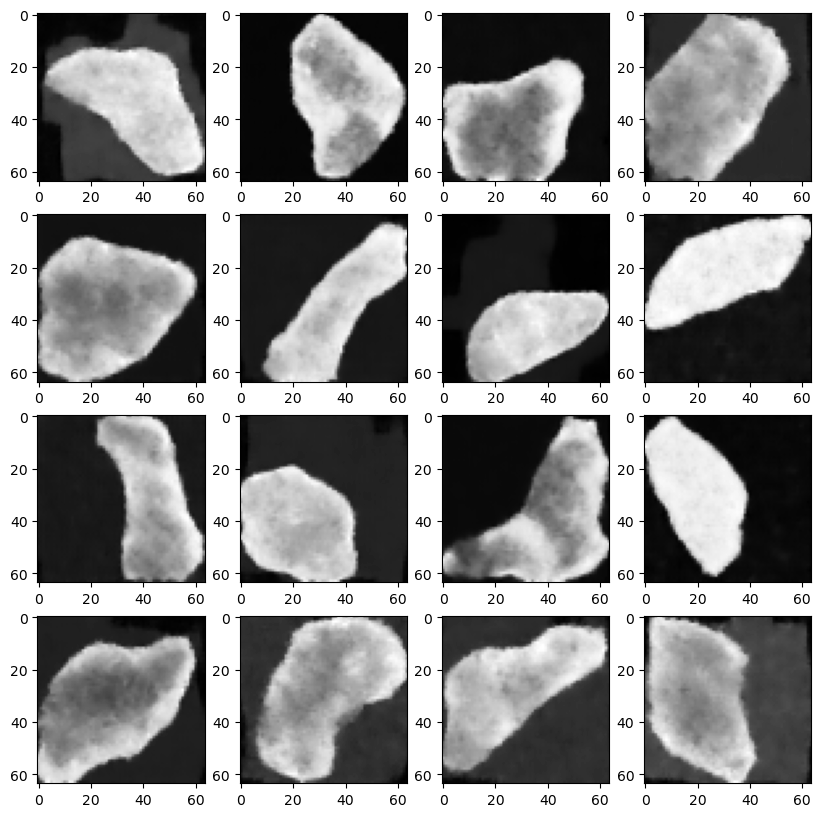

In [22]:
samples = show_samples(16, diffusion, model, image_size, channels)

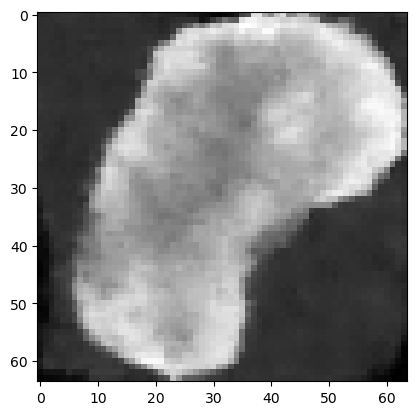

In [23]:
import matplotlib.animation as animation

random_index = 13

fig = plt.figure()
ims = []
for i in range(timesteps):
    im = plt.imshow(
        samples[i][random_index].reshape(image_size, image_size, channels),
        cmap="gray",
        animated=True,
    )
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save("diffusion.gif")
plt.show()